In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Shuffling
data = data.sample(frac=1)
data.reset_index(inplace=True)
data.drop(["index"], axis=1, inplace=True)

<Axes: xlabel='class', ylabel='count'>

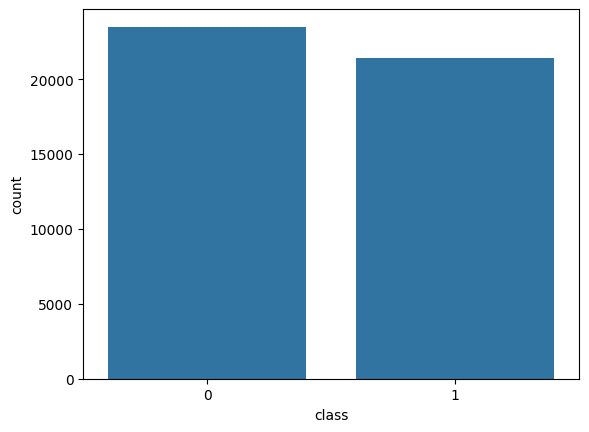

In [ ]:
sns.countplot(data=data,
              x='class',
              order=data['class'].value_counts().index)

In [ ]:
from tqdm import tqdm
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess_text(text_data):
    preprocessed_text = []

    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', sentence)
        preprocessed_text.append(' '.join(token.lower()
                                  for token in str(sentence).split()
                                  if token not in stopwords.words('english')))

    return preprocessed_text

In [ ]:
preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review

100%|██████████| 44919/44919 [27:26<00:00, 27.29it/s]


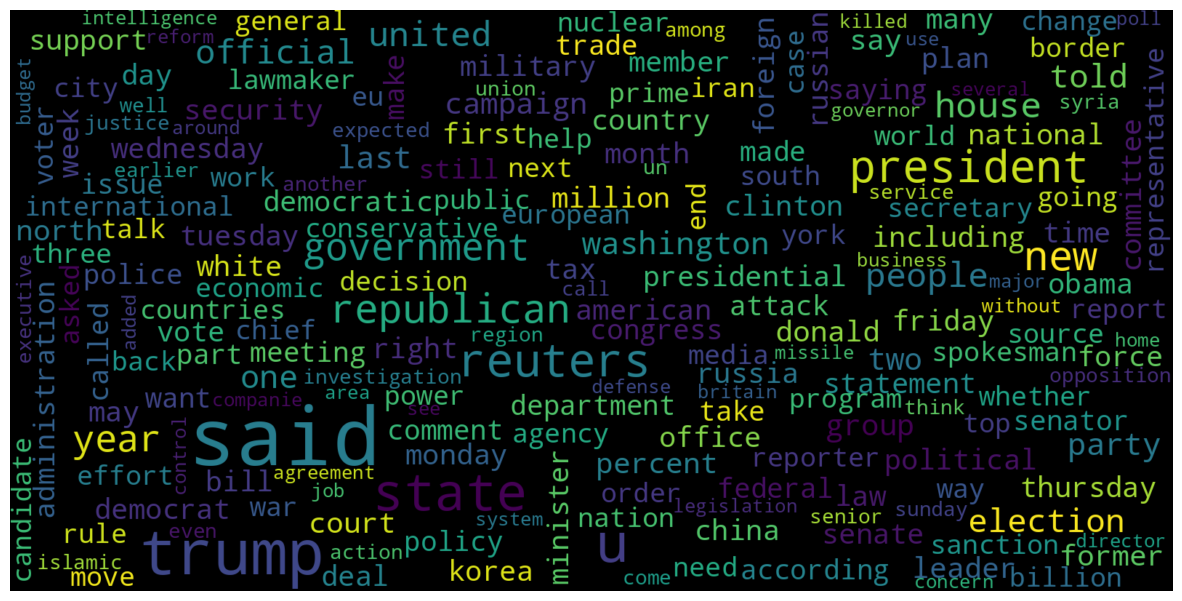

In [ ]:
# Real
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 1].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

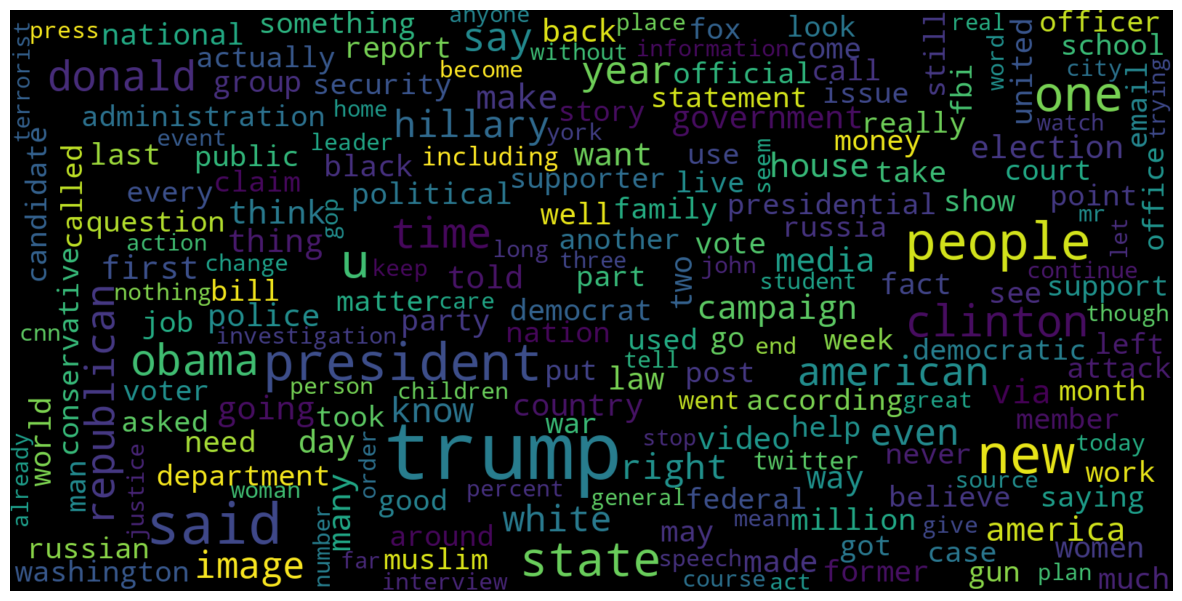

In [ ]:
# Fake
consolidated = ' '.join(
    word for word in data['text'][data['class'] == 0].astype(str))
wordCloud = WordCloud(width=1600,
                      height=800,
                      random_state=21,
                      max_font_size=110,
                      collocations=False)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

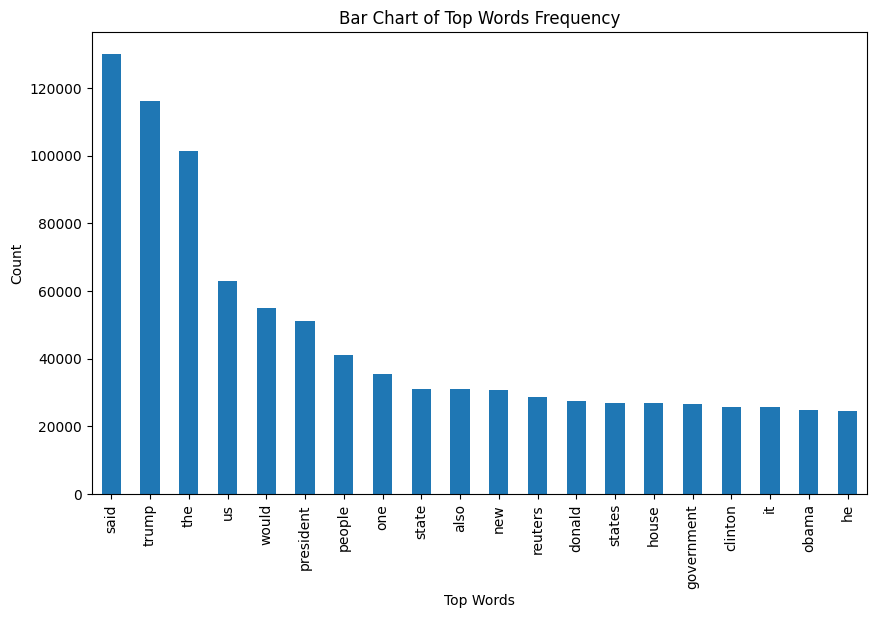

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1],
                        reverse=True)
    return words_freq[:n]


common_words = get_top_n_words(data['text'], 20)
df1 = pd.DataFrame(common_words, columns=['Review', 'count'])

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel="Top Words",
    ylabel="Count",
    title="Bar Chart of Top Words Frequency"
)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(data['text'],
                                                    data['class'],
                                                    test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
x_train = vectorization.fit_transform(x_train)
x_test = vectorization.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9939446110006234
0.9898486197684773


In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# testing the model
print(accuracy_score(y_train, model.predict(x_train)))
print(accuracy_score(y_test, model.predict(x_test)))

0.9999703167205913
0.9959038290293856


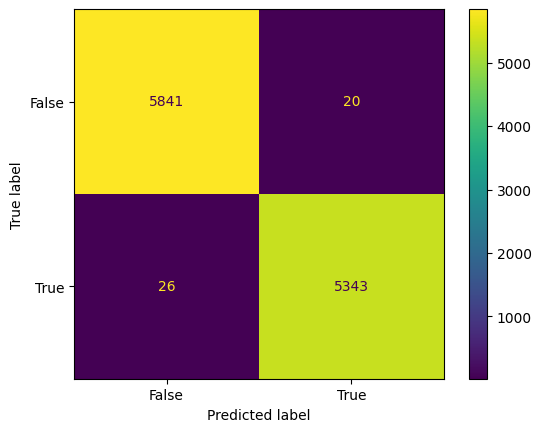

In [ ]:
# Confusion matrix of Results from Decision Tree classification
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, model.predict(x_test))

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=[False, True])

cm_display.plot()
plt.show()

In [ ]:
# Classical ML models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# ✅ Multinomial Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
y_pred_nb = nb_model.predict(x_test)
print("Multinomial Naive Bayes:\n", classification_report(y_test, y_pred_nb))

# ✅ Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(x_train, y_train)
y_pred_lr = lr_model.predict(x_test)
print("Logistic Regression:\n", classification_report(y_test, y_pred_lr))

# ✅ Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
print("Random Forest:\n", classification_report(y_test, y_pred_rf))

# ✅ XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)
print("XGBoost:\n", classification_report(y_test, y_pred_xgb))


Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      5861
           1       0.94      0.96      0.95      5369

    accuracy                           0.95     11230
   macro avg       0.95      0.95      0.95     11230
weighted avg       0.95      0.95      0.95     11230

Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5861
           1       0.99      0.99      0.99      5369

    accuracy                           0.99     11230
   macro avg       0.99      0.99      0.99     11230
weighted avg       0.99      0.99      0.99     11230

Random Forest:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5861
           1       0.99      0.99      0.99      5369

    accuracy                           0.99     11230
   macro avg       0.99      0.99      0.99     11230
weighted a

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5861
           1       1.00      1.00      1.00      5369

    accuracy                           1.00     11230
   macro avg       1.00      1.00      1.00     11230
weighted avg       1.00      1.00      1.00     11230



In [ ]:
!pip install xgboost
!pip install transformers tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense


# ✅ Tokenize and pad
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(x_train_raw)
x_train_seq = tokenizer.texts_to_sequences(x_train_raw)
x_test_seq = tokenizer.texts_to_sequences(x_test_raw)

x_train_pad = pad_sequences(x_train_seq, maxlen=200)
x_test_pad = pad_sequences(x_test_seq, maxlen=200)

# ✅ LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=10000, output_dim=128, input_length=200))
lstm_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.fit(x_train_pad, y_train, epochs=5, batch_size=64, validation_split=0.2)

# ✅ Evaluate on test set
loss, accuracy = lstm_model.evaluate(x_test_pad, y_test)
print("LSTM Test Accuracy:", accuracy)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


450/450 ━━━━━━━━━━━━━━━━━━━━ 157s 336ms/step - accuracy: 0.8985 - loss: 0.2592 - val_accuracy: 0.9762 - val_loss: 0.0805
Epoch 2/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 203s 338ms/step - accuracy: 0.9812 - loss: 0.0589 - val_accuracy: 0.9809 - val_loss: 0.0623
Epoch 3/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 200s 335ms/step - accuracy: 0.9885 - loss: 0.0373 - val_accuracy: 0.9846 - val_loss: 0.0510
Epoch 4/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 147s 327ms/step - accuracy: 0.9925 - loss: 0.0255 - val_accuracy: 0.9847 - val_loss: 0.0542
Epoch 5/5
450/450 ━━━━━━━━━━━━━━━━━━━━ 228s 385ms/step - accuracy: 0.9924 - loss: 0.0236 - val_accuracy: 0.9876 - val_loss: 0.0458
281/281 ━━━━━━━━━━━━━━━━━━━━ 17s 60ms/step - accuracy: 0.9860 - loss: 0.0479
LSTM Test Accuracy: 0.987088143825531


In [ ]:
x_raw = data['text']        # your original text column
y = data['class']           # your target labels

x_train_raw, x_test_raw, y_train, y_test = train_test_split(x_raw, y, test_size=0.2, random_state=42)


In [ ]:
from transformers import BertTokenizer, TFBertForSequenceClassification, create_optimizer
import tensorflow as tf

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Encode input text
def encode_examples(texts, labels, max_len=128):
    encodings = tokenizer(texts.tolist(), truncation=True, padding=True, max_length=max_len, return_tensors='tf')
    dataset = tf.data.Dataset.from_tensor_slices((
        dict(encodings),
        tf.convert_to_tensor(labels)
    ))
    return dataset

# Create datasets
train_dataset = encode_examples(x_train_raw, y_train).batch(16)
test_dataset = encode_examples(x_test_raw, y_test).batch(16)

# Load model
bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Create optimizer using Hugging Face utility
steps_per_epoch = len(train_dataset)
num_train_steps = steps_per_epoch * 3  # for 3 epochs
optimizer, _ = create_optimizer(init_lr=2e-5, num_warmup_steps=0, num_train_steps=num_train_steps)

# Compile the model
bert_model.compile(optimizer=optimizer,
                   loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   metrics=['accuracy'])

# Train
bert_model.fit(train_dataset, epochs=3)

# Evaluate
loss, accuracy = bert_model.evaluate(test_dataset)
print("BERT Test Accuracy:", accuracy)


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
  47/2246 [..............................] - ETA: 13:22:12 - loss: 0.3174 - accuracy: 0.9069